In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ta import add_all_ta_features
import yfinance as yf
# mock data visuallization
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
# for writing to file
from pathlib import Path  

### Get the time data from real stock in the market
to generate mock data

In [3]:
aapl_df = yf.Ticker("AAPL").history(interval= "1d",start="2018-01-01", end="2022-12-31")


In [4]:
def process_input(dataframe):
    if (dataframe.index.name == 'Date'):
        dataframe = dataframe.reset_index()

    dataframe['Date'] = pd.to_datetime(dataframe['Date'].dt.date)
    dataframe = dataframe.set_index('Date')
    return dataframe


In [5]:
date_index = process_input(aapl_df).index
plot_style = "checkers"
fsize = (15, 6)

In [6]:
# generate varience of stock by random number
def varience_multiplier(multiplier, stockdata):
    return np.random.rand(len(stockdata)) * stockdata * multiplier

In [7]:
# create open high low Dataframe from close price time series data
def add_mock_details(base_price_series, index):

    y_base = base_price_series
    y_close = y_base + varience_multiplier(0.1, y_base)
    y_open = y_close + varience_multiplier(0.1, y_base)

    compare_close_open = y_close > y_open

    high_modifier = np.absolute(varience_multiplier(0.1, y_base))
    low_modifier = np.absolute(varience_multiplier(0.1, y_base))
    y_high = np.where(compare_close_open, y_close + high_modifier, y_open + high_modifier)
    y_low = np.where(compare_close_open, y_open - low_modifier, y_close - low_modifier)

    data = {'Open': y_open, 'High': y_high, 'Low': y_low, 'Close': y_close}

    df = pd.DataFrame(data, index=index)

    return df

In [8]:
# write file
def write_to_csv(df, filename):
    dir = './mock_data/' + filename + ".csv"
    filepath = Path(dir)  
    filepath.parent.mkdir(parents=True, exist_ok=True)

    df.to_csv(filepath) 

### Test generating and loading data

In [9]:
X_train = date_index

y_base = np.arange(50,100,50/len(date_index)) 
print(y_base[0:5])
df = add_mock_details(y_base, date_index)
df.head()
write_to_csv(df, "test")

[50.         50.03971406 50.07942812 50.11914218 50.15885624]


In [10]:
df = pd.read_csv("./mock_data/test.csv", index_col=0)
df.head()

,Open,High,Low,Close
Date,,,,
2018-01-02,53.807950,54.747924,48.721528,53.629631
2018-01-03,53.414392,56.592259,48.409655,52.098345
2018-01-04,55.501182,59.941503,48.398047,51.558209
2018-01-05,52.698683,53.252035,48.985348,52.184311
2018-01-08,55.472861,58.306508,50.978501,51.721727


# Mock Patterns

## Linear Mock Data

### low varience

In [11]:
X_train = date_index
y_train = np.arange(50,100,50/len(date_index)) 
y_noise = np.random.rand(len(date_index)) * y_train * 0.1
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "linear_low_varince")

(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

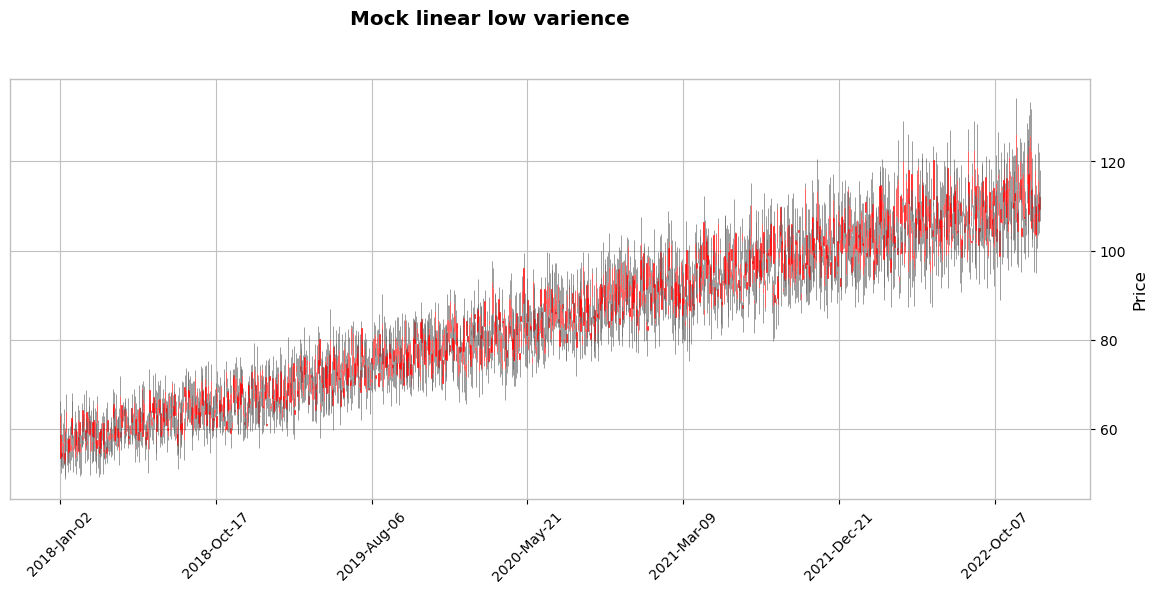

In [12]:
mpf.plot(df,
         type="candle", 
         title = "Mock linear low varience",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

### high varience

In [13]:
X_train = date_index
y_train = np.arange(50,100,50/len(date_index)) 
y_noise = np.random.rand(len(date_index)) * y_train * 0.5
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "linear_high_varince")

(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

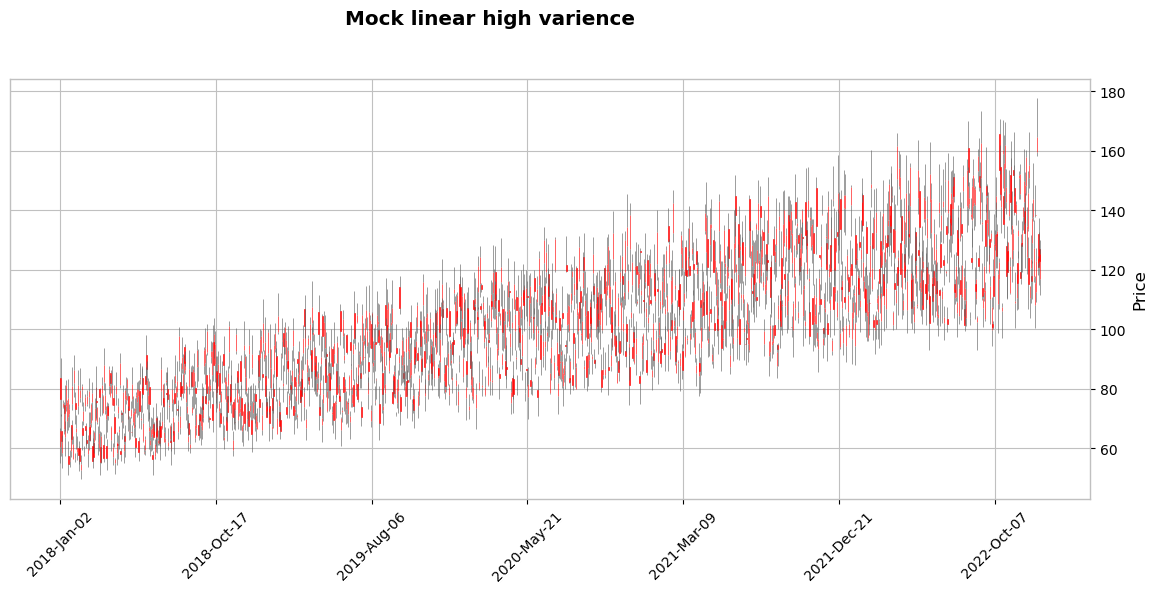

In [14]:
mpf.plot(df,
         type="candle", 
         title = "Mock linear high varience",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

## Sin Wave Mock Data

In [15]:
X_train = date_index
y_train = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave")

(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

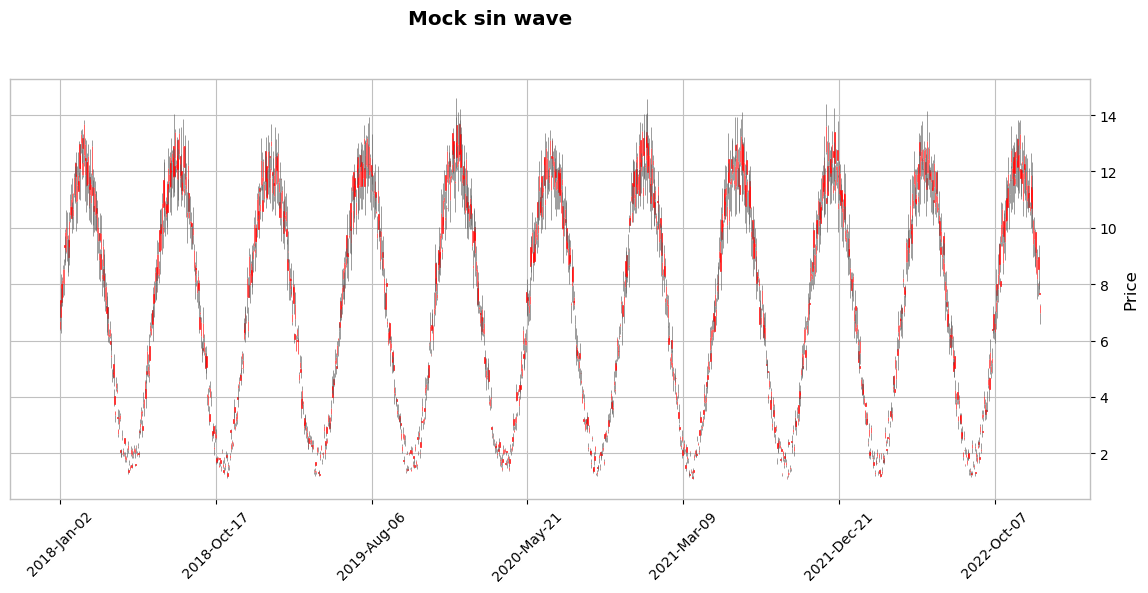

In [16]:
mpf.plot(df,
         type="candle", 
         title = "Mock sin wave",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

## Sin Wave Mock Data + shift pi/4

In [17]:
X_train = date_index
y_train = np.sin(np.array(range(len(date_index)))*np.pi/60 + np.pi/4) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train += y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_shift_pi_d_4")

(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

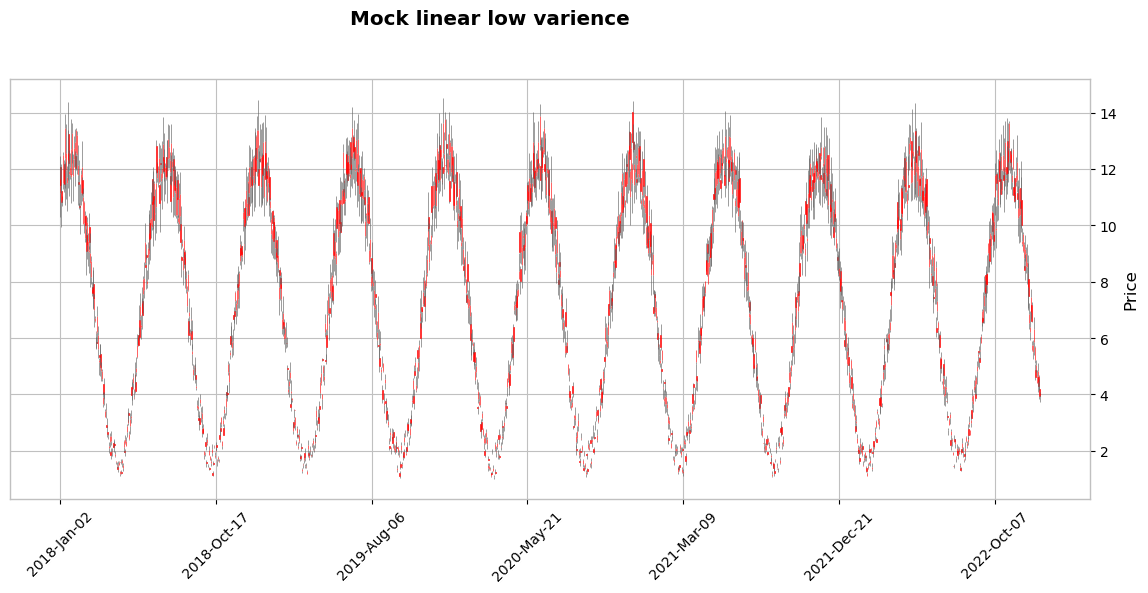

In [18]:
mpf.plot(df,
         type="candle", 
         title = "Mock linear low varience",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

## Sin Wave Going up

In [19]:
range(len(date_index))

range(0, 1259)

In [20]:
X_train = date_index
y_linear = np.arange(50,100,50/len(date_index)) 
y_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train = y_linear + y_sin + y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_up")

(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

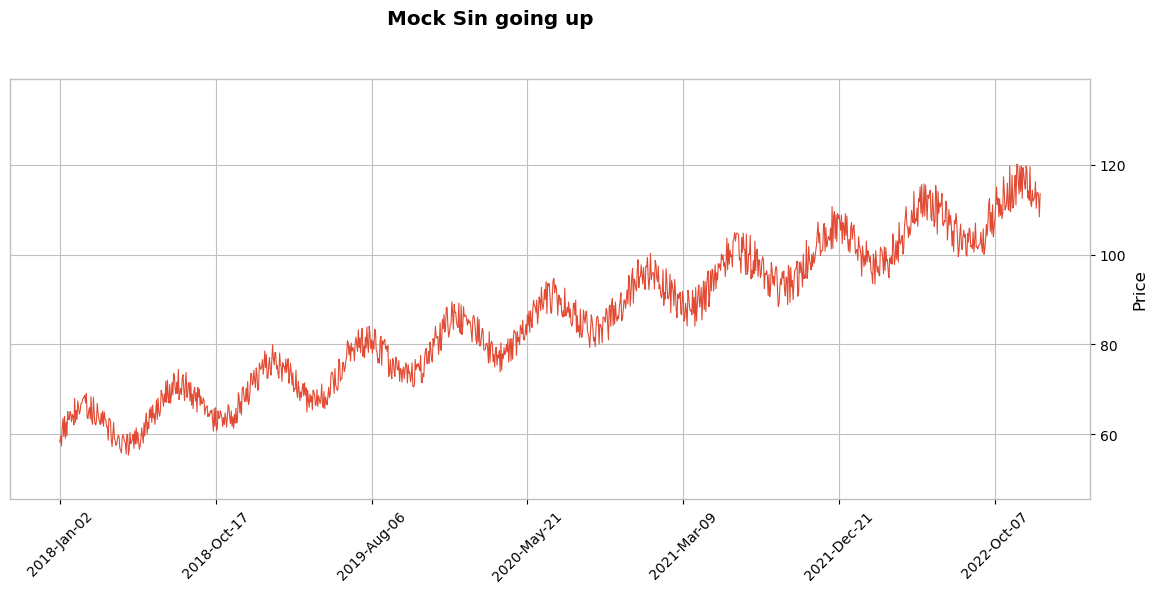

In [21]:
mpf.plot(df,
         type="line", 
         title = "Mock Sin going up",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

## Sin Wave Going down

In [22]:
X_train = date_index
y_linear = np.flip(np.arange(20,100,80/len(date_index))) 
y_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train = y_linear + y_sin + y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_down")


(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

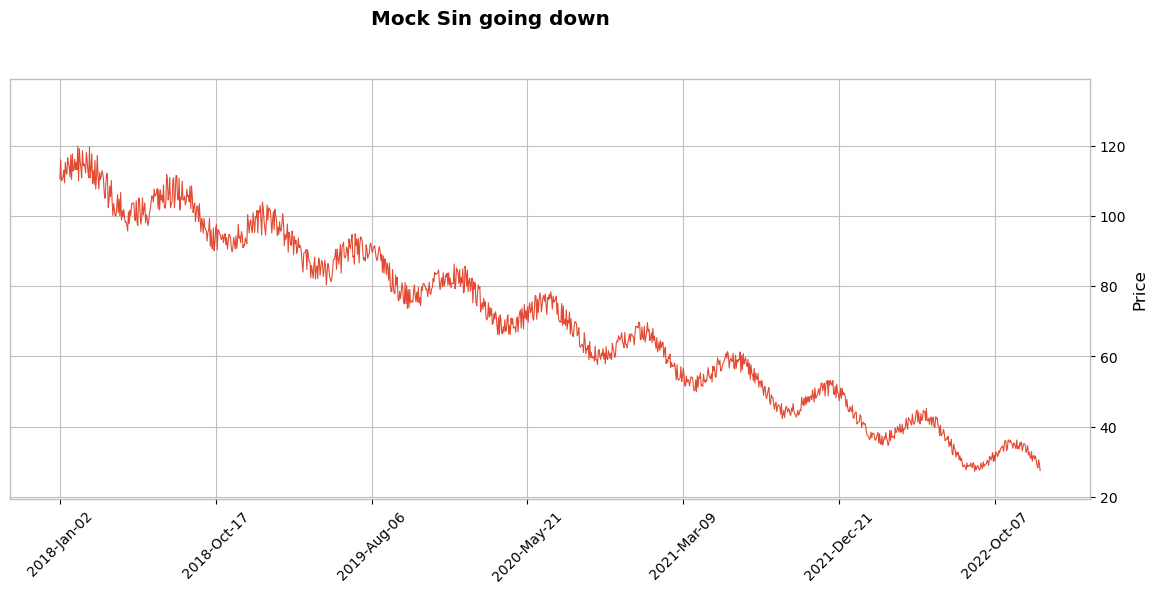

In [23]:
mpf.plot(df,
         type="line", 
         title = "Mock Sin going down",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )

## Sin Wave Going up then down

In [24]:
X_train = date_index
len_going_up = int(13*len(date_index)/16)
y_linear = np.concatenate([np.arange(50,100,50/len_going_up) , np.flip(np.arange(88,100,12/(len(date_index)-len_going_up)))] )
y_sin = np.sin(np.array(range(len(date_index)))*np.pi/60) * 5 + 6
y_noise = np.random.rand(len(date_index))
y_train = y_linear + y_sin + y_noise
df = add_mock_details(y_train, date_index)
write_to_csv(df, "sin_wave_going_up_then_down")

(<Figure size 1500x600 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

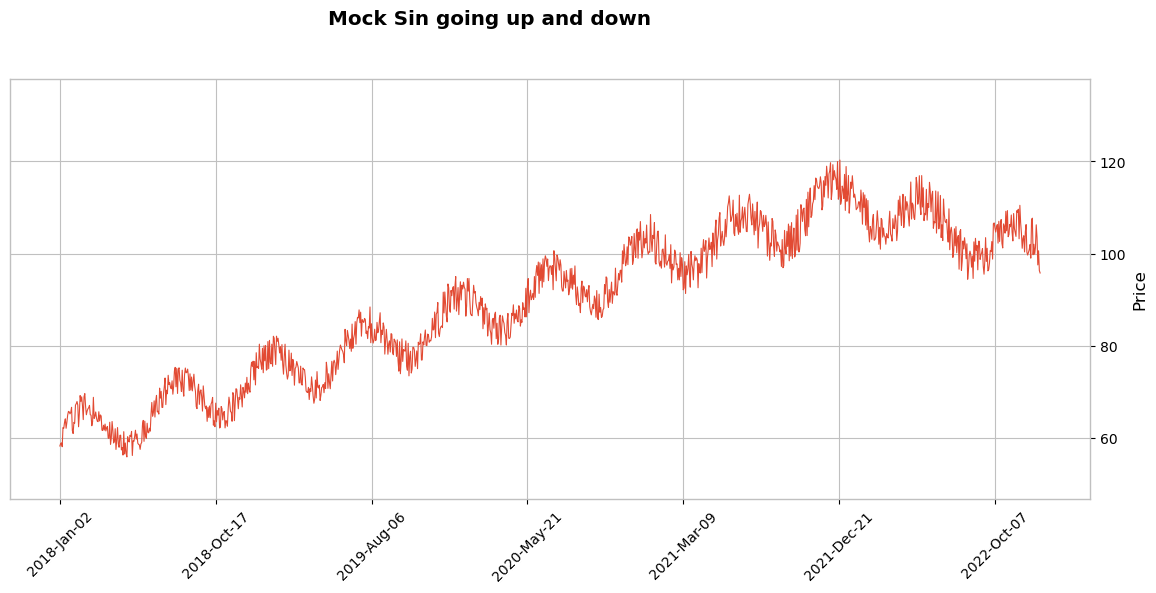

In [25]:
mpf.plot(df,
         type="line", 
         title = "Mock Sin going up and down",  
         figsize=fsize,
         style=plot_style, 
         returnfig=True,
         show_nontrading=False,
         warn_too_much_data=1500
    )